## Assignment-1
### Pradeep Mundlik, AI21BTECH11022

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm, cauchy
from astropy.stats import median_absolute_deviation
from astroML.stats import sigmaG
import pandas as pd

### Q-1

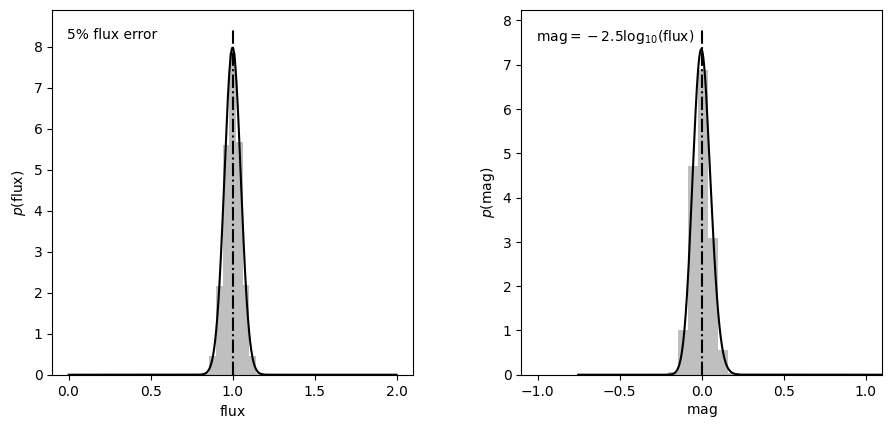

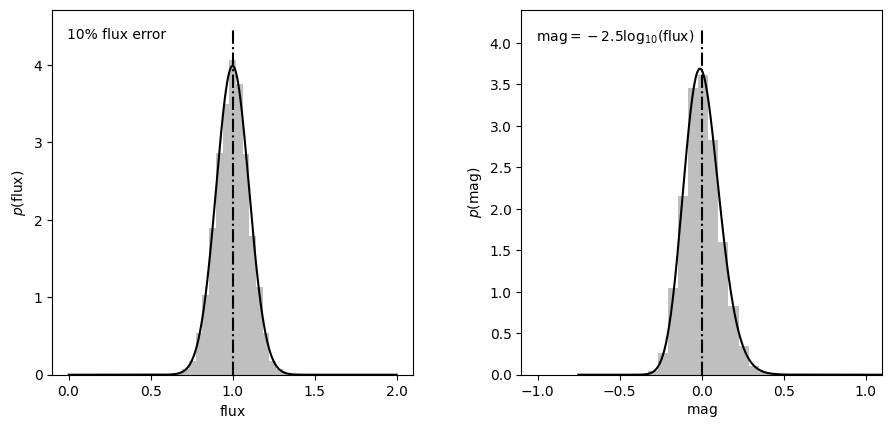

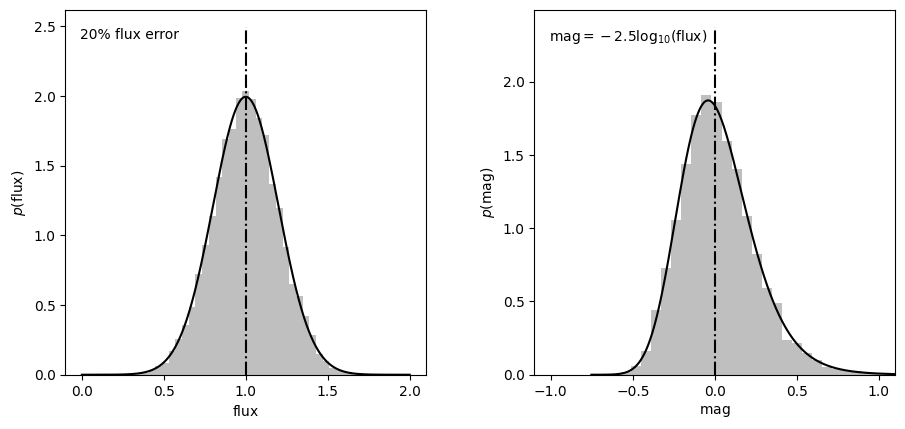

In [29]:
## Note: Code for this question is taken from book
def plot_(err):
        # Create our data

        # generate 10000 normally distributed points
        np.random.seed(1)
        dist = norm(loc=1, scale=err)
        flux = dist.rvs(10000)
        flux_fit = np.linspace(0.001, 2, 1000)
        pdf_flux_fit = dist.pdf(flux_fit)

        # transform this distribution into magnitude space
        mag = -2.5 * np.log10(flux)
        mag_fit = -2.5 * np.log10(flux_fit)
        pdf_mag_fit = pdf_flux_fit.copy()
        pdf_mag_fit[1:] /= abs(mag_fit[1:] - mag_fit[:-1])
        pdf_mag_fit /= np.dot(pdf_mag_fit[1:], abs(mag_fit[1:] - mag_fit[:-1]))

        #------------------------------------------------------------
        # Plot the result
        fig = plt.figure(figsize=(10, 5))
        fig.subplots_adjust(bottom=0.17, top=0.9, left=0.12, right=0.95, wspace=0.3)

        ax = fig.add_subplot(121)
        ax.hist(flux, bins=np.linspace(0, 2, 50), histtype='stepfilled', fc='gray', alpha=0.5, density=True)
        ax.plot(flux_fit, pdf_flux_fit, '-k')
        ax.plot([1, 1], [0, max(pdf_flux_fit)+0.5], '-.', color='#000')

        ax.set_xlabel(r'${\rm flux}$')
        ax.set_ylabel(r'$p({\rm flux})$')
        ax.text(0.04, 0.95, f'{int(err*100)}% flux error', ha='left', va='top', transform=ax.transAxes)
        # plt.grid()

        # next plot the magnitude distribution
        ax = fig.add_subplot(122)
        ax.hist(mag, bins=np.linspace(-1, 2, 50), histtype='stepfilled', fc='gray', alpha=0.5, density=True)
        ax.plot(mag_fit, pdf_mag_fit, '-k')
        ax.plot([0, 0], [0, max(pdf_mag_fit)+0.5], '-.', color='#000')
        ax.set_xlim(-1.1, 1.1)
        # ax.set_ylim(0, 5)

        ax.set_xlabel(r'${\rm mag}$')
        ax.set_ylabel(r'$p({\rm mag})$')
        ax.text(0.04, 0.95, r'${\rm mag} = -2.5\log_{10}({\rm flux})$', ha='left', va='top', transform=ax.transAxes)
        # plt.grid()
        plt.show()

plot_(0.05)
plot_(0.10)
plot_(0.20)

 **Obervation:**  As flux error increses, assymetricity in magnitude plot increases. 

### Q-2

In [4]:
dist = norm(1.5, 0.5)
rv = dist.rvs(1000)
p = dist.pdf(rv)

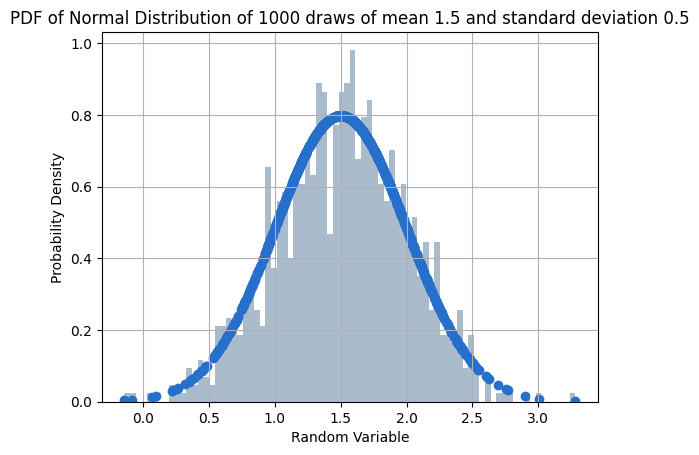

In [5]:
plt.hist(rv, bins=80, density=True, histtype='barstacked', fc='#ABC')
plt.scatter(rv, p, color='#266FCB')
plt.grid()
plt.title("PDF of Normal Distribution of 1000 draws of mean 1.5 and standard deviation 0.5") 
plt.xlabel("Random Variable")
plt.ylabel("Probability Density")
plt.show()

In [6]:
print('Sample mean is: ', np.mean(rv))
print('Sample variance is: ', np.var(rv))
print('Skewnness is: ', stats.skew(rv))
print('Kurtosis is: ', stats.kurtosis(rv))
print('MAD is: ', median_absolute_deviation(rv))
print('$\sigma_G$ is: ', sigmaG(rv))

Sample mean is:  1.5106087998628224
Sample variance is:  0.2451947534991927
Skewnness is:  -0.1153698344677762
Kurtosis is:  -0.014897295036694125
MAD is:  0.3385080545162056
$\sigma_G$ is:  0.5063075940485616


### Q-3

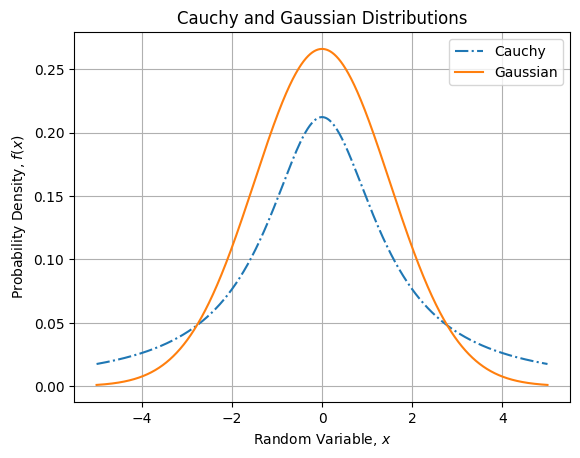

In [7]:
dist1 = cauchy(0, 1.5)
dist2 = norm(0, 1.5)

x = np.arange(-5, 5, 1e-3)
plt.plot(x, dist1.pdf(x), linestyle = '-.')
plt.plot(x, dist2.pdf(x))
plt.legend(['Cauchy','Gaussian'])
plt.title("Cauchy and Gaussian Distributions")
plt.xlabel("Random Variable, $x$")
plt.ylabel("Probability Density, $f(x)$")
plt.grid()
plt.show()

### Q-4

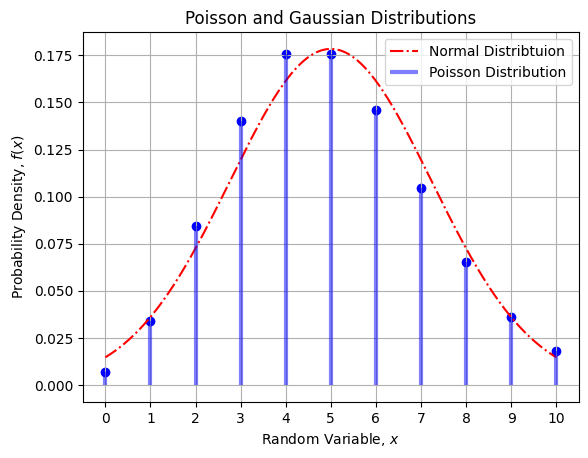

In [28]:

x = np.linspace(0 , 10 , 1000)
normal = norm.pdf(x , loc = 5 , scale = 5 ** 0.5)
plt.plot(x , normal , 'r-.', label = 'Normal Distribtuion')

x = np.arange(0, 11) 
Poisson = stats.poisson.pmf(x , mu = 5)

plt.vlines(x, 0, Poisson, color='b', lw=3, alpha = 0.5, label='Poisson Distribution')
plt.scatter(x, Poisson, color='b', marker='o')
plt.legend()
plt.xticks(x)
plt.title("Poisson and Gaussian Distributions")
plt.xlabel("Random Variable, $x$")
plt.ylabel("Probability Density, $f(x)$")
plt.grid()
plt.show()

### Q-5

In [ ]:
data = [{0.8920,0.00044},{0.881,0.009},{0.8913,0.00032},{0.9837,0.00048},{0.8958,0.00045}]
df = pd.DataFrame(data, columns=['x', 'error'])
df

,x,error
0,0.8920,0.00044
1,0.8810,0.00900
2,0.8913,0.00032
3,0.9837,0.00048
4,0.8958,0.00045


In [ ]:
#calculating mean
df['numerator'] = df['x']/ df['error']**2
df['denominator'] = 1/df['error']**2

#mean
mean = df['numerator'].sum()/df['denominator'].sum()
sd = np.sqrt(1/df['denominator'].sum())

print('Mean is: ', mean)
print('Standard deviation is: ', sd)

Mean is:  0.9089185199574897
Standard deviation is:  0.00020318737026848627


### Q-6

In [ ]:
df = pd.read_csv('exoplanets.csv')
e = df['eccentricity'].dropna()

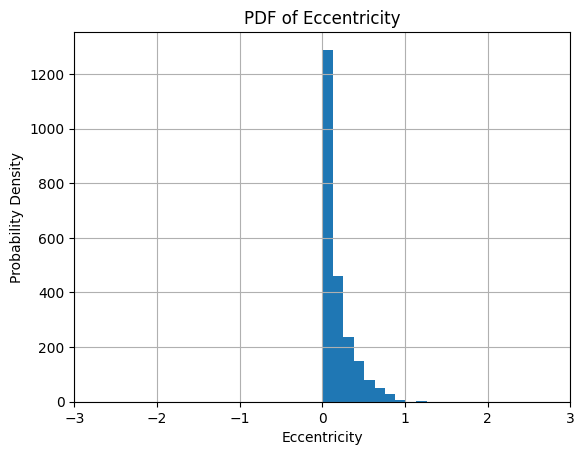

In [ ]:
#histogram of eccentricity
plt.hist(e,bins=25)
plt.xlim(-3,3)
plt.title("PDF of Eccentricity")
plt.xlabel("Eccentricity")
plt.ylabel("Probability Density")
plt.grid()
plt.show()

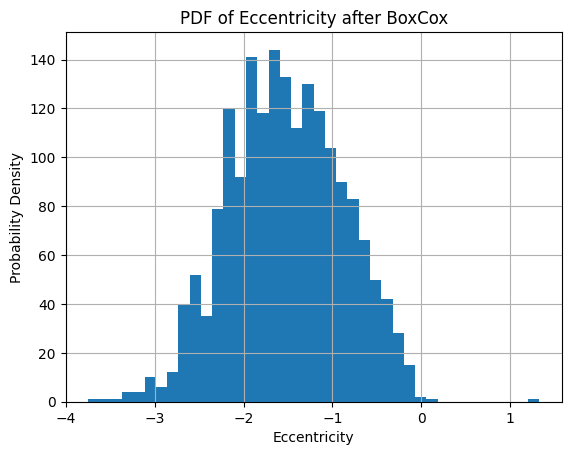

In [ ]:
#Gaussianizing the data using BoxCox
boxcoxdata = e[e>0]
bc_e, lmbda = stats.boxcox(boxcoxdata)
plt.hist(bc_e,bins=40)
plt.title("PDF of Eccentricity after BoxCox")
plt.xlabel("Eccentricity")
plt.ylabel("Probability Density")
plt.grid()
plt.show()